#### Loading Data Set

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('sudoku_uk.csv').drop('Unnamed: 0', axis=1)

df = df.replace({'Gentle': 'Gentle-1', 'Moderate': 'Moderate-2', 'Tough': 'Tough-3','Diabolical': 'Diabolical-4'})

In [3]:
# check size
df.shape

(5017, 8)

In [4]:
df.head()

,URL,Level,People,Average-Time,Unit-Time,Sudoku,Solution,Id
0,http://www.sudoku.org.uk/DailySudoku.asp?solut...,Moderate-2,292,14,minutes,.96..3.4.8.....1..4....6.829....4.....4.5.3......,2961835478754291364315769829583642717149523683...,0
1,http://www.sudoku.org.uk/DailySudoku.asp?solut...,Gentle-1,283,12,minutes,..7..34....17528......8.....4.5...3.1.2...5.8....,9871634254317528696259843718495167321623795487...,1
2,http://www.sudoku.org.uk/DailySudoku.asp?solut...,Diabolical-4,238,30,minutes,.6...3.7.....6.1.49.......3..97.45..7...1...9....,8641239753259671849175486232897345617462158391...,2
3,http://www.sudoku.org.uk/DailySudoku.asp?solut...,Moderate-2,274,14,minutes,.54....8.....4..7.79...8.....26..1....35..2......,1547639823289456717962183459726341588435712965...,3
4,http://www.sudoku.org.uk/DailySudoku.asp?solut...,Diabolical-4,244,28,minutes,..2...9......425.....751...4.......63.7...8..8...,5126389477639425819847516234218953763571268948...,4


In [5]:
# Reorganizing the columns
list(df.columns)

['URL',
 'Level',
 'People',
 'Average-Time',
 'Unit-Time',
 'Sudoku',
 'Solution',
 'Id']

In [6]:
df = df[['Id', 'Level', 'Sudoku','Solution', 'People', 'Average-Time','Unit-Time','URL']]

In [7]:
df.head()

,Id,Level,Sudoku,Solution,People,Average-Time,Unit-Time,URL
0,0,Moderate-2,.96..3.4.8.....1..4....6.829....4.....4.5.3......,2961835478754291364315769829583642717149523683...,292,14,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...
1,1,Gentle-1,..7..34....17528......8.....4.5...3.1.2...5.8....,9871634254317528696259843718495167321623795487...,283,12,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...
2,2,Diabolical-4,.6...3.7.....6.1.49.......3..97.45..7...1...9....,8641239753259671849175486232897345617462158391...,238,30,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...
3,3,Moderate-2,.54....8.....4..7.79...8.....26..1....35..2......,1547639823289456717962183459726341588435712965...,274,14,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...
4,4,Diabolical-4,..2...9......425.....751...4.......63.7...8..8...,5126389477639425819847516234218953763571268948...,244,28,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...


### Who many levels are there?

In [8]:
df['Level'].value_counts()

Moderate-2      2151
Diabolical-4    1432
Gentle-1         717
Tough-3          717
Name: Level, dtype: int64

##### On the website they rank the levels in this way from the easiest to the most difficult:
##### 1. Gentle 
##### 2. Moderate 
##### 3. Tough 
##### 4. Diabolical


### QUESTION / HYPTHESIS /RESULTS

#### 1) Is the number of people who solve easy Sudoku greater than those who solve difficult?
#### Hypothesis: the total of players fro the level "Gentle" is bigger than the leven "Diabolical" 
#### Results:

In [9]:
df['People'].groupby([df['Level']]).sum()

Level
Diabolical-4     954833
Gentle-1         594821
Moderate-2      1697595
Tough-3          534043
Name: People, dtype: int64

In [10]:
df.groupby('Level')[['People']].sum()

,People
Level,
Diabolical-4,954833
Gentle-1,594821
Moderate-2,1697595
Tough-3,534043


In [11]:
gb1 = df.groupby('Level', as_index=False).agg({"People": "sum"}).sort_values(by='People', ascending=False)
total= gb1.People.sum()
gb1['%'] = gb1['People']/total
gb1.head()

,Level,People,%
2,Moderate-2,1697595,0.448946
0,Diabolical-4,954833,0.252515
1,Gentle-1,594821,0.157306
3,Tough-3,534043,0.141233


In [12]:
diabolical = gb1[gb1['Level']=='Diabolical-4'].values[0,1]
gentle = gb1[gb1['Level']=='Gentle-1'].values[0,1]


In [13]:
if gentle > diabolical:
    print('Hyphothesis is True')
else: 
    print('The hypothesis is False , more people plays diabolical than Gentle')

The hypothesis is False , more people plays diabolical than Gentle


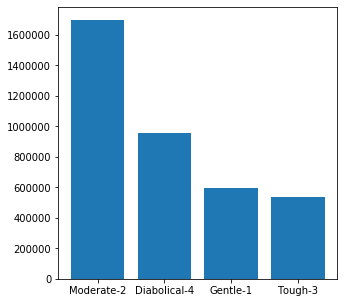

In [14]:
### Plot 
plt.figure(figsize=(5, 5))
plt.bar(gb1['Level'], gb1['People'])
plt.show();

#### 2) Does it take more time for people to solve the most difficult  ?
#### Hypothesis: The average time to solve Sudoku in a "Diabolical" level is bigger than "Thought" level
#### Results:

In [15]:
gb2 = df.groupby('Level', as_index=False).agg({"Average-Time": "mean"}).sort_values(by='Average-Time', ascending=False)
gb2.head()

,Level,Average-Time
0,Diabolical-4,31.043994
3,Tough-3,24.037657
2,Moderate-2,17.211994
1,Gentle-1,13.919107


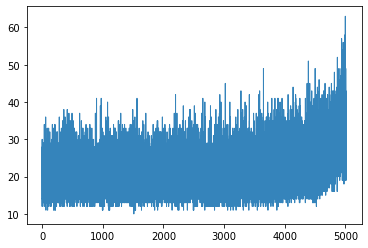

In [75]:
plt.plot(df['Id'], df['Average-Time'], marker='', linewidth=1, alpha=0.9, label=df['Level'])

#### 3) Is the difficulty of a level defined by the amound of numbers given in the initial Sudoku?
#### Hypothesis: Each Level has a range of numbers given in the initial Sudoku
#### Results:

In [53]:
# df['number_given'] = df.apply(lambda row: row.Sudoku.isdigit(), axis = 1)
# df.head()

In [16]:
len(df)

5017

In [17]:
df['number_given']= 0
for i in range(len(df)):
    df['number_given'][i] = sum(c.isdigit() for c in df['Sudoku'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
sum(c.isdigit() for c in df['Sudoku'][0])

25

In [19]:
df['number_given'][0]

25

In [20]:
df.head()

,Id,Level,Sudoku,Solution,People,Average-Time,Unit-Time,URL,number_given
0,0,Moderate-2,.96..3.4.8.....1..4....6.829....4.....4.5.3......,2961835478754291364315769829583642717149523683...,292,14,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...,25
1,1,Gentle-1,..7..34....17528......8.....4.5...3.1.2...5.8....,9871634254317528696259843718495167321623795487...,283,12,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...,28
2,2,Diabolical-4,.6...3.7.....6.1.49.......3..97.45..7...1...9....,8641239753259671849175486232897345617462158391...,238,30,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...,27
3,3,Moderate-2,.54....8.....4..7.79...8.....26..1....35..2......,1547639823289456717962183459726341588435712965...,274,14,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...,25
4,4,Diabolical-4,..2...9......425.....751...4.......63.7...8..8...,5126389477639425819847516234218953763571268948...,244,28,minutes,http://www.sudoku.org.uk/DailySudoku.asp?solut...,25


In [21]:
number_gentle = df['number_given'][df['Level']=='Gentle-1'].unique()
number_moderate = df['number_given'][df['Level']=='Moderate-2'].unique()
number_tough = df['number_given'][df['Level']=='Tough-3'].unique()
number_diabolical = df['number_given'][df['Level']=='Diabolical-4'].unique()

In [22]:
number_gentle

array([28, 24, 27, 25, 26, 23, 29])

In [23]:
number_moderate

array([25, 28, 27, 24, 26, 23, 22, 29])

In [24]:
number_tough

array([25, 26, 24, 28, 27, 23, 22, 29])

In [25]:
number_diabolical

array([27, 25, 24, 28, 26, 23, 21, 22, 29])

#### PREDICT if base on the position I can predict the level

In [33]:
df.shape

(5017, 9)

In [26]:
def split(sudoku): 
    return [char for char in sudoku] 

In [36]:
test = df[['Sudoku']]
test.shape

(5017, 1)

In [37]:
len(test)

5017

In [38]:
for i in range(len(test)):
    test[i] = split(test[i])

KeyError: 0

In [40]:
test.head()

,Sudoku
0,"[., 9, 6, ., ., 3, ., 4, ., 8, ., ., ., ., ., ..."
1,"[., ., 7, ., ., 3, 4, ., ., ., ., 1, 7, 5, 2, ..."
2,"[., 6, ., ., ., 3, ., 7, ., ., ., ., ., 6, ., ..."
3,"[., 5, 4, ., ., ., ., 8, ., ., ., ., ., 4, ., ..."
4,"[., ., 2, ., ., ., 9, ., ., ., ., ., ., 4, 2, ..."


In [46]:
from sklearn.model_selection import train_test_split

In [48]:
y = df[['Level']]
# features = df.drop(['Level','Unit-Time','Id','URL'], axis=1)
x = test

In [49]:
x.head()

,Sudoku
0,"[., 9, 6, ., ., 3, ., 4, ., 8, ., ., ., ., ., ..."
1,"[., ., 7, ., ., 3, 4, ., ., ., ., 1, 7, 5, 2, ..."
2,"[., 6, ., ., ., 3, ., 7, ., ., ., ., ., 6, ., ..."
3,"[., 5, 4, ., ., ., ., 8, ., ., ., ., ., 4, ., ..."
4,"[., ., 2, ., ., ., 9, ., ., ., ., ., ., 4, 2, ..."


In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4013, 1), (4013, 1), (1004, 1), (1004, 1))